In [1]:
from google.colab import files

uploaded = files.upload()

Saving imdb_indonesian_movies_2.csv to imdb_indonesian_movies_2.csv


In [2]:
import pandas as pd
df = pd.read_csv('imdb_indonesian_movies_2.csv')
df

,judul_film,ringkasan_sinopsis,genre
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama
...,...,...,...
1000,Winter in Tokyo,Winter in Tokyo berpusat pada kehidupan Ishida...,Romantis
1001,Petualang Cinta,Markonah melarikan diri ke Jakarta karena akan...,Romantis
1002,Last Night (III),"Tempat aking lebih dari 36 jam, Last Night ada...",Romantis
1003,Path of Light,Proyek baru ini adalah tentang seorang lelaki ...,Romantis


In [3]:
# Remove unnecessary column
df = df.drop(columns=['judul_film'])

In [4]:
# One-hot-encoding process and create a new dataframe
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [5]:
# Convert the values from the dataframe into the numpy array data type using the attribute 'values'
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

In [6]:
sinopsis

array(['Raden Mas Said putra sulung Tumenggung Wilarikta di bawah Kerajaan Majapahit yang berkuasa di wilayah Tuban melihat sekeluarga miskin yang menderita busung lapar. Ia merasa sangat prihatin dan hati nuraninya tergugah untuk menolong. Kemudian ia mencoba secara diam-diam mengambil makanan dari lumbung orang tuanya. Perbuatan itu tidak disetujui orang tuanya bahkan ia dihukum sekap di gudang makanan itu. Sejak kejadian itu RM Said yang tumbuh dewasa tidak betah tinggal di rumah. Ia berkelana dari daerah satu ke daerah lainnya. Dari sanalah ia tahu betapa banyak penyelewengan dan kesewenang-wenangan para lurah yang munafik. Mereka selalu mengkambing-hitamkan Tumenggung untuk menutupi kejahatannya. Atas laporan RM Said ayahnya kemudian sadar. Tetapi kemudian ia dianggap sebagai sumber fitnah. Dalam kelananya kemudian ia bertemu dengan Sunan Bonang yang banyak mencurahkan ilmunya kepada RM Said. Ia pun kemudian melakukan tapa di pinggir kali. Berkat ketabahannya menghadapi berbagai c

In [7]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [8]:
# Convert each word in the dataset into numeric data using the 'tokenizer' function
# After that, convert each sample into a sequence

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [9]:
# Create a model
   # embedding dimension = 16
   # input dimension is equal to the value of num_words in the tokenizer object
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
# Train the model
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
26/26 - 38s - loss: 1.6103 - accuracy: 0.2040 - val_loss: 1.6110 - val_accuracy: 0.1940 - 38s/epoch - 1s/step
Epoch 2/30
26/26 - 34s - loss: 1.6001 - accuracy: 0.2525 - val_loss: 1.6008 - val_accuracy: 0.2189 - 34s/epoch - 1s/step
Epoch 3/30
26/26 - 45s - loss: 1.4974 - accuracy: 0.3930 - val_loss: 1.5611 - val_accuracy: 0.2786 - 45s/epoch - 2s/step
Epoch 4/30
26/26 - 38s - loss: 1.2032 - accuracy: 0.5560 - val_loss: 1.6797 - val_accuracy: 0.2637 - 38s/epoch - 1s/step
Epoch 5/30
26/26 - 33s - loss: 0.9151 - accuracy: 0.6667 - val_loss: 1.8260 - val_accuracy: 0.2935 - 33s/epoch - 1s/step
Epoch 6/30
26/26 - 33s - loss: 0.5153 - accuracy: 0.8321 - val_loss: 2.3424 - val_accuracy: 0.3234 - 33s/epoch - 1s/step
Epoch 7/30
26/26 - 33s - loss: 0.2630 - accuracy: 0.9229 - val_loss: 2.9636 - val_accuracy: 0.2985 - 33s/epoch - 1s/step
Epoch 8/30
26/26 - 32s - loss: 0.1383 - accuracy: 0.9677 - val_loss: 3.3543 - val_accuracy: 0.3134 - 32s/epoch - 1s/step
Epoch 9/30
26/26 - 34s - loss: 0

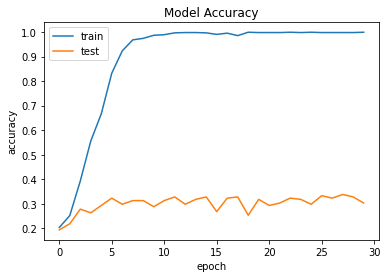

In [11]:
# Plot the accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

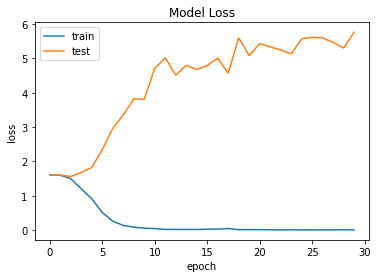

In [12]:
# Plot the loss of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()